# Вебинар 3. Визуализация и анализ данных.

**План занятия**
* [EDA](#eda)
* [Загрузка данных](#load)
* [Уменьшение объема памяти, который занимает датасет](#reduce)
* [1. Распределение целевой переменной](#target)
* [2. Анализ признаков](#features)
    * [2.1 Количественные признаки](#num_features)
    * [2.2 Категориальные признаки](#cat_features)
    * [2.3 Бинарные признаки](#binary_features)
    * [2.4 Матрица корреляций](#corr)
* [3. Анализ зависимости таргета от фичей](#target_features)
    * [3.1 Количественные признаки](#num_features_target)
    * [3.2 Категориальные / бинарные признаки](#cat_bin_features)
    * [3.3 Гео данные](#geo)

**EDA** - Exploratory Data Analysis (Исследовательский анализ данных ) <a class='anchor' id='eda'>

_Kaggle House Prices: Advanced Regression Techniques competition:_

- Short EDA [beginner's tutorial](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)
- Extended EDA [master's tutorial](https://www.kaggle.com/caicell/fun-python-eda-step-by-step) 

**Зачем это?**
- Понимание, как устроены данные
- Проверка фичей на адекватность
- _Генерация новых фич_ - наибольший вклад в качество прогноза

**3 шага EDA в Data Science**
1. Распределение таргета (целевой признак - что надо найти)
2. Распределение фичей (остальные показатели)
1-2. Привести данные в рабочее состояние: убрать пропуски, дубликаты, выбросы, привести к одному типу данных
3. Графики влияния фичей на таргет (корреляция - влияние фичей друг на друга и на таргет)

**Подключение библиотек и скриптов**

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
matplotlib.rcParams.update({'font.size': 14})  # размер шрифта на графиках

**Пути к директориям и файлам**

In [3]:
# DATASET_PATH = '../les_3/housing_prepared.csv' # (sep=';')
DATASET_PATH = '../les_3/housing_w3.csv' # (sep=',')
PREPARED_DATASET_PATH = '.housing_w5.csv'
CALIFORNIA_MAP_PATH = 'California_Map.png'

### Загрузка данных<a class='anchor' id='load'>

**Описание датасета**

Статистические данные о ряде домов в Калифорнии, основанные на переписи 1990 года.

* **longitude** - долгота
* **latitude** - широта
* **housing_median_age** - средний возраст дома
* **total_rooms** - общее количество комнат
* **total_bedrooms** - общее количество спален
* **population** - количество проживающих
* **households** - домохозяйства
* **ocean_proximity** - близость океана
* **median_income** - средний доход
* **median_house_value** - средняя стоимость дома (таргет)

In [4]:
df = pd.read_csv(DATASET_PATH, sep=',')
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

   id  bedroom_share  population_per_room  <1H OCEAN  INLAND  ISLAND  \
0   0      14.659091             0.365909          0       0       0   
1   1      15.579659             0.338217          0       0       0   
2   2      12.951602             0.338105          0       0       0   
3   3      18.445840             0.437991          0       0       0   
4   4      17.209588             0.347265          0       0       0   

   NEAR BAY  NEAR OCEAN  
0         1           0  
1         1           0  
2         1           0  
3         1           0  
4         1           0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   longitude            20640 non-null  float64
 1   latitude             20640 non-null  float64
 2   housing_median_age   20640 non-null  float64
 3   total_rooms          20640 non-null  float64
 4   total_bedrooms       20640 non-null  float64
 5   population           20640 non-null  float64
 6   households           20640 non-null  float64
 7   median_income        20640 non-null  float64
 8   median_house_value   20640 non-null  float64
 9   ocean_proximity      20640 non-null  object 
 10  id                   20640 non-null  int64  
 11  bedroom_share        20640 non-null  float64
 12  population_per_room  20640 non-null  float64
 13  <1H OCEAN            20640 non-null  int64  
 14  INLAND               20640 non-null  int64  
 15  ISLAND               20640 non-null 

### Уменьшение объема памяти, который занимает датасет**<a class='anchor' id='reduce'>

https://www.kaggle.com/gemartin/load-data-reduce-memory-usage

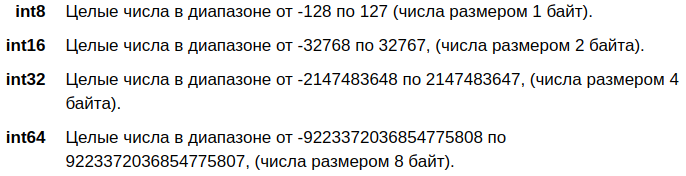

In [6]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [7]:
df = reduce_mem_usage(df)

Memory usage of dataframe is 2.83 MB
Memory usage after optimization is: 1.02 MB
Decreased by 63.9%


In [8]:
df.dtypes

longitude               float32
latitude                float32
housing_median_age      float32
total_rooms             float32
total_bedrooms          float32
population              float32
households              float32
median_income           float32
median_house_value      float32
ocean_proximity        category
id                        int16
bedroom_share           float32
population_per_room     float32
<1H OCEAN                  int8
INLAND                     int8
ISLAND                     int8
NEAR BAY                   int8
NEAR OCEAN                 int8
dtype: object

---

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   longitude            20640 non-null  float32 
 1   latitude             20640 non-null  float32 
 2   housing_median_age   20640 non-null  float32 
 3   total_rooms          20640 non-null  float32 
 4   total_bedrooms       20640 non-null  float32 
 5   population           20640 non-null  float32 
 6   households           20640 non-null  float32 
 7   median_income        20640 non-null  float32 
 8   median_house_value   20640 non-null  float32 
 9   ocean_proximity      20640 non-null  category
 10  id                   20640 non-null  int16   
 11  bedroom_share        20640 non-null  float32 
 12  population_per_room  20640 non-null  float32 
 13  <1H OCEAN            20640 non-null  int8    
 14  INLAND               20640 non-null  int8    
 15  ISLAND             

# 1. Распределение целевой переменной<a class='anchor' id='target'>

- Помните про различие среднего арифметическое, медианы, моды
- Среднее арифметическое (мат ожидание) подходят для нормальных распределений = SUM / N
- Медиана (quantile 50%) - практически для любых распределений = Середина отранжированного ряда
- Мода - для категориальных переменных = наиболее часто встречающееся значение в выборке

[0, 0, 1, 3, 4, 5, 5, 7, 8, 8]
median - 4.5
mean - 4.1
mode - 0


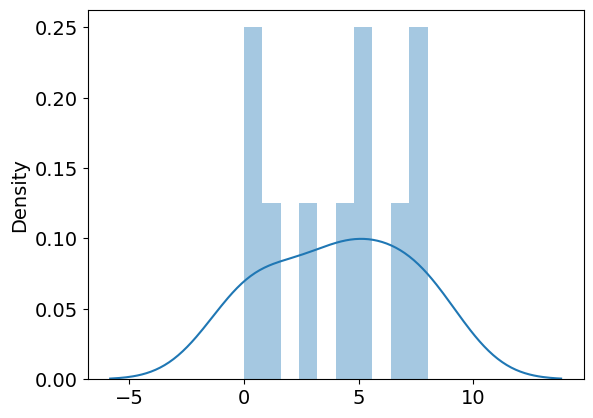

In [10]:
x = np.random.randint(0, 10, 10)
print(sorted(x))
print(f'median - {np.quantile(x, q=0.5)}\nmean - {np.mean(x)}\nmode - {stats.mode(x)[0][0]}')
sns.distplot(x, bins=10); # сглаживает данные

In [11]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569305     35.631676           28.665747   2635.763184   
std        2.003455      2.135854           12.355020   2181.615234   
min     -124.349998     32.540001            1.000000      2.000000   
25%     -121.800003     33.930000           19.000000   1447.750000   
50%     -118.489998     34.259998           29.000000   2127.000000   
75%     -118.010002     37.709999           37.000000   3148.000000   
max     -114.309998     41.950001           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20640.000000  20640.000000  20640.000000   20640.000000   
mean       536.838867   1417.860474    499.539673       3.870671   
std        419.391876   1119.445312    382.329773       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.000000    797.000000    280.000000       2.563400   
50%        435.000000   1165.000000    409.000000       3.534800   
75%        643.250000   1701.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value            id  bedroom_share  population_per_room  \
count        20640.000000  20640.000000   20640.000000         20640.000000   
mean        206855.812500  10319.500000      21.379410             0.626358   
std         115395.617188   5958.399114       6.524817             2.910131   
min          14999.000000      0.000000       3.715091             0.018109   
25%         119600.000000   5159.750000      17.522470             0.434290   
50%         179700.000000  10319.500000      20.315913             0.516088   
75%         264725.000000  15479.250000      24.012628             0.659127   
max         500001.000000  20639.000000     282.467529           392.631592   

          <1H OCEAN        INLAND        ISLAND      NEAR BAY    NEAR OCEAN  
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000  
mean       0.443314      0.316957      0.000242      0.110853      0.128634  
std        0.496788      0.465302      0.015563      0.313957      0.334802  
min        0.000000      0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000      0.000000      0.000000  
75%        1.000000      1.000000      0.000000      0.000000      0.000000  
max        1.000000      1.000000      1.000000      1.000000      1.000000

In [12]:
df.mode()

longitude   latitude  housing_median_age  total_rooms  total_bedrooms  \
0     -118.309998  34.060001                52.0       1527.0           435.0   
1             NaN        NaN                 NaN          NaN             NaN   
2             NaN        NaN                 NaN          NaN             NaN   
3             NaN        NaN                 NaN          NaN             NaN   
4             NaN        NaN                 NaN          NaN             NaN   
...           ...        ...                 ...          ...             ...   
20635         NaN        NaN                 NaN          NaN             NaN   
20636         NaN        NaN                 NaN          NaN             NaN   
20637         NaN        NaN                 NaN          NaN             NaN   
20638         NaN        NaN                 NaN          NaN             NaN   
20639         NaN        NaN                 NaN          NaN             NaN   

       population  households  median_income  median_house_value  \
0          1165.0       306.0         3.1250            500001.0   
1             NaN         NaN        15.0001                 NaN   
2             NaN         NaN            NaN                 NaN   
3             NaN         NaN            NaN                 NaN   
4             NaN         NaN            NaN                 NaN   
...           ...         ...            ...                 ...   
20635         NaN         NaN            NaN                 NaN   
20636         NaN         NaN            NaN                 NaN   
20637         NaN         NaN            NaN                 NaN   
20638         NaN         NaN            NaN                 NaN   
20639         NaN         NaN            NaN                 NaN   

      ocean_proximity     id  bedroom_share  population_per_room  <1H OCEAN  \
0           <1H OCEAN      0           25.0                  0.4        0.0   
1                 NaN      1            NaN                  0.5        NaN   
2                 NaN      2            NaN                  NaN        NaN   
3                 NaN      3            NaN                  NaN        NaN   
4                 NaN      4            NaN                  NaN        NaN   
...               ...    ...            ...                  ...        ...   
20635             NaN  20635            NaN                  NaN        NaN   
20636             NaN  20636            NaN                  NaN        NaN   
20637             NaN  20637            NaN                  NaN        NaN   
20638             NaN  20638            NaN                  NaN        NaN   
20639             NaN  20639            NaN                  NaN        NaN   

       INLAND  ISLAND  NEAR BAY  NEAR OCEAN  
0         0.0     0.0       0.0         0.0  
1         NaN     NaN       NaN         NaN  
2         NaN     NaN       NaN         NaN  
3         NaN     NaN       NaN         NaN  
4         NaN     NaN       NaN         NaN  
...       ...     ...       ...         ...  
20635     NaN     NaN       NaN         NaN  
20636     NaN     NaN       NaN         NaN  
20637     NaN     NaN       NaN         NaN  
20638     NaN     NaN       NaN         NaN  
20639     NaN     NaN       NaN         NaN  

[20640 rows x 18 columns]

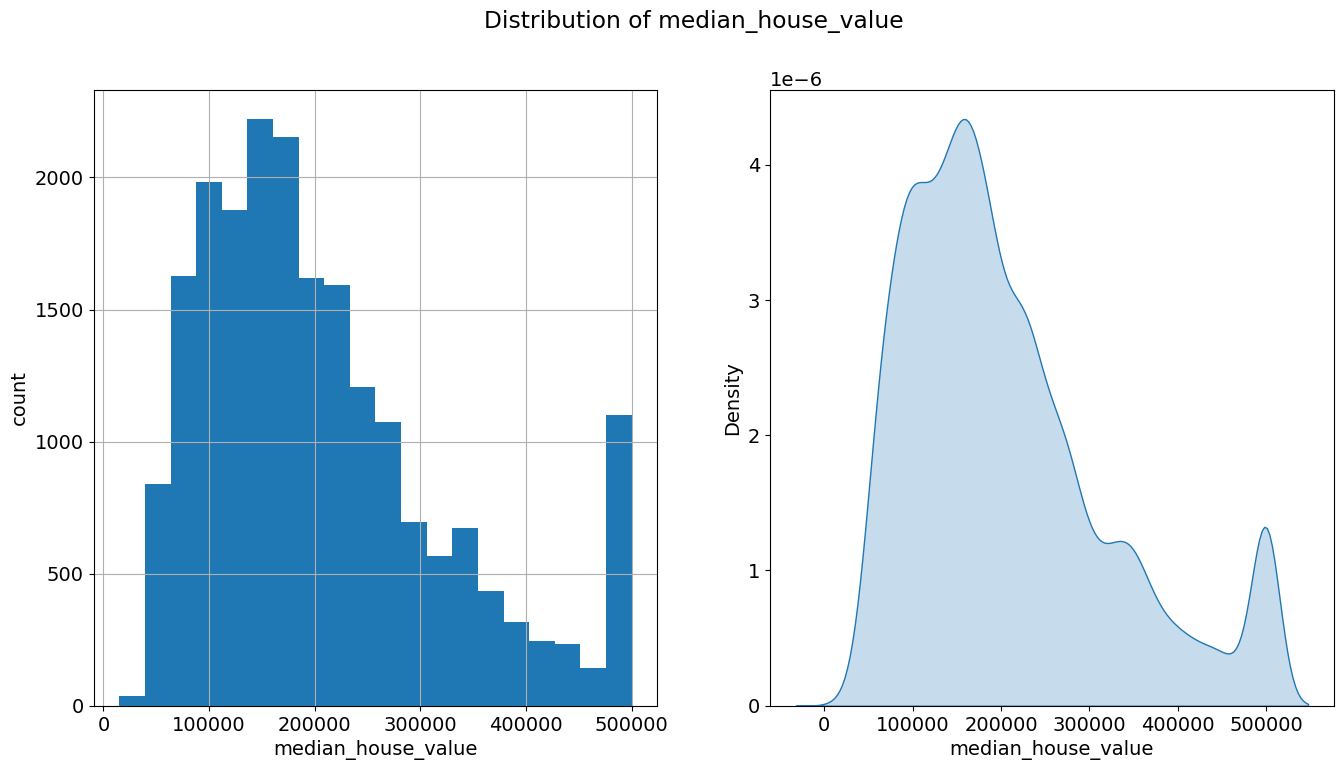

In [13]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
df['median_house_value'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('median_house_value')

plt.subplot(122)
sns.kdeplot(df['median_house_value'], shade=True, legend=False) # плотность признаков
plt.xlabel('median_house_value')

plt.suptitle('Distribution of median_house_value')
plt.show()

на графике видно распеределение стоимости домов. Большая часть значений находится  в диапазоне 100000-200000. Далее с увеличение цены, количество домой снижается. Также есть более 1000 домов с ценой 500000+, однозначно сказать выбросы это или нет мы пока не можем

посчитаем медиану, моду и среднее для целевой переменной

In [14]:
target_mean = round(df['median_house_value'].mean(), 2)
target_median = df['median_house_value'].median()
target_mode = df['median_house_value'].mode()[0]

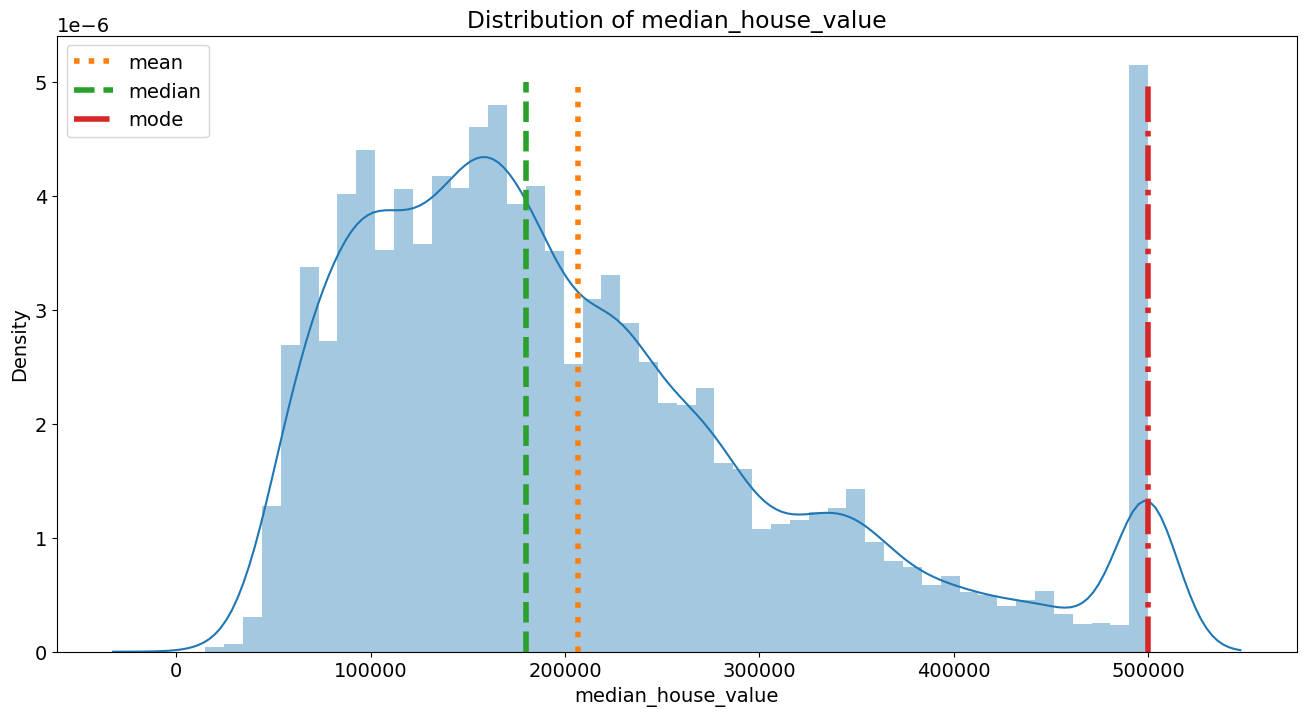

In [15]:
plt.figure(figsize = (16, 8))

sns.distplot(df['median_house_value'], bins=50)

y = np.linspace(0, 0.000005, 10)
plt.plot([target_mean] * 10, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 10, y, label='median', linestyle='--', linewidth=4)
plt.plot([target_mode] * 10, y, label='mode', linestyle='-.', linewidth=4)

plt.title('Distribution of median_house_value')
plt.legend()
plt.show()

* медиана - четко по середине датасета
* среднее смещается относительно медианы в зависимости от выбросов

Вывод: все эти значения (медиана, среднее и мода) должны находиться примерно в одном месте (не быть разбросаными). В данном случае, мода находится далеко от "центра" значений и подозрительно совпадает с ценой домов 500000+, возможно, с этими данными чтото не так (ошибка с заполнении данных)

In [16]:
df['median_house_value'].describe() 

count     20640.000000
mean     206855.812500
std      115395.617188
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [17]:
# количество объектов с ценой >500000
df.loc[df['median_house_value']>500000, ['total_rooms']].count()

total_rooms    965
dtype: int64

#### *** Категоризация целевого признака
сделана в качестве доказательства, что значения больше 500000 - выбросы.

Цель: Разбить данные по ценам на категории (с шагом в 10000) и подсчитать моду на этих данных

разбиваем данные на категории

In [18]:
target_bins = df['median_house_value'] // 10000 * 10000
# 0 - 10000 --> 0
# 10001 - 20000 --> 1
# ...

display(target_bins)
target_adjusted_mode = target_bins.mode()[0]

target_adjusted_mode

0        450000.0
1        350000.0
2        350000.0
3        340000.0
4        340000.0
           ...   
20635     70000.0
20636     70000.0
20637     90000.0
20638     80000.0
20639     80000.0
Name: median_house_value, Length: 20640, dtype: float32

160000.0

In [19]:
# число значений до перевода в категории
df['median_house_value'].value_counts()

500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
           ... 
359200.0      1
54900.0       1
377600.0      1
81200.0       1
47000.0       1
Name: median_house_value, Length: 3842, dtype: int64

In [20]:
target_bins

0        450000.0
1        350000.0
2        350000.0
3        340000.0
4        340000.0
           ...   
20635     70000.0
20636     70000.0
20637     90000.0
20638     80000.0
20639     80000.0
Name: median_house_value, Length: 20640, dtype: float32

In [21]:
# количество после переведения в категории
target_bins.value_counts().iloc[:10]

160000.0    1005
500000.0     992
150000.0     970
90000.0      920
180000.0     853
130000.0     850
110000.0     847
170000.0     807
140000.0     802
80000.0      768
Name: median_house_value, dtype: int64

In [22]:
# количество уникальных значений (бинов, категорий)
len(np.unique(target_bins))

50

In [23]:
# список категорий
np.unique(target_bins)

array([ 10000.,  20000.,  30000.,  40000.,  50000.,  60000.,  70000.,
        80000.,  90000., 100000., 110000., 120000., 130000., 140000.,
       150000., 160000., 170000., 180000., 190000., 200000., 210000.,
       220000., 230000., 240000., 250000., 260000., 270000., 280000.,
       290000., 300000., 310000., 320000., 330000., 340000., 350000.,
       360000., 370000., 380000., 390000., 400000., 410000., 420000.,
       430000., 440000., 450000., 460000., 470000., 480000., 490000.,
       500000.], dtype=float32)

построение графика метрик центральной тенденции (среднее, мода, медиана) на категоризированных данных

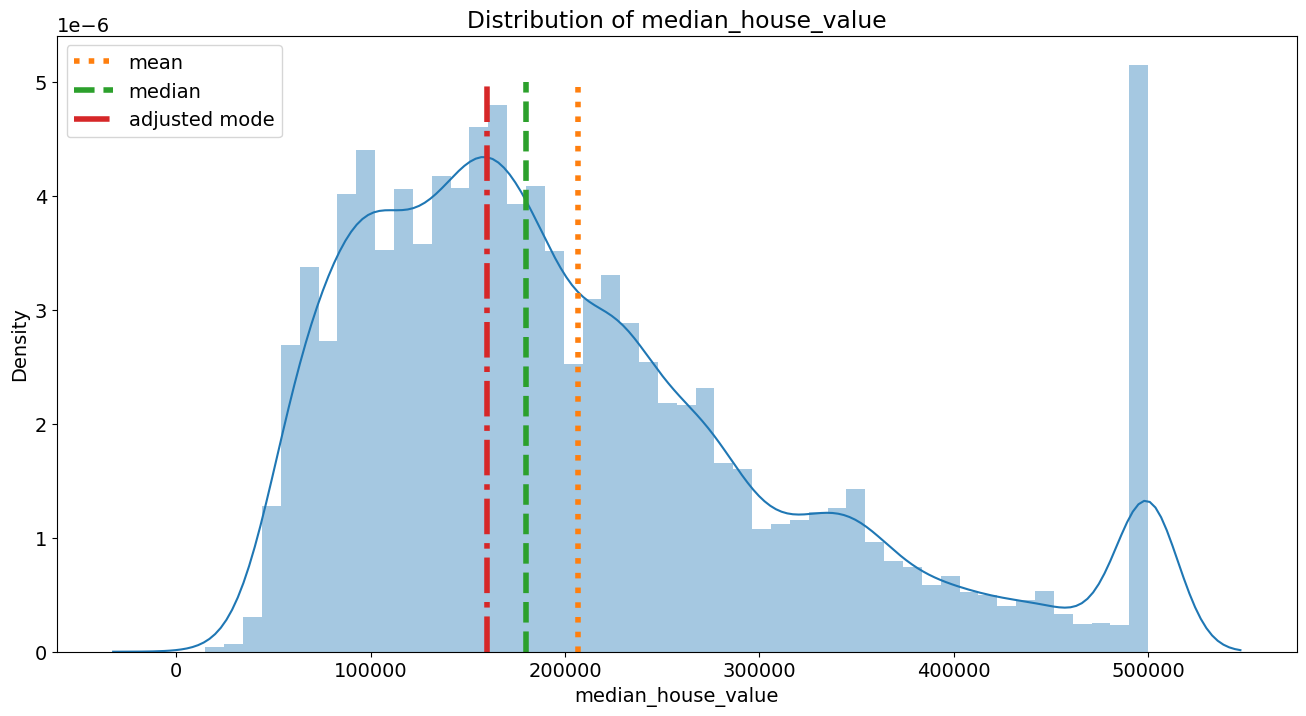

In [24]:
plt.figure(figsize = (16, 8))

sns.distplot(df['median_house_value'], bins=50) 

y = np.linspace(0, 0.000005, 10)
plt.plot([target_mean] * 10, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 10, y, label='median', linestyle='--', linewidth=4)
plt.plot([target_adjusted_mode] * 10, y, label='adjusted mode', linestyle='-.', linewidth=4)

plt.title('Distribution of median_house_value')
plt.legend()
plt.show()

Вывод: все метрики находятся примерно в одном месте, следовательно, значений бюольше 500000 - это выбросы

#### конец ***

Либо можем сразу выкинуть эти странные значения из выборки

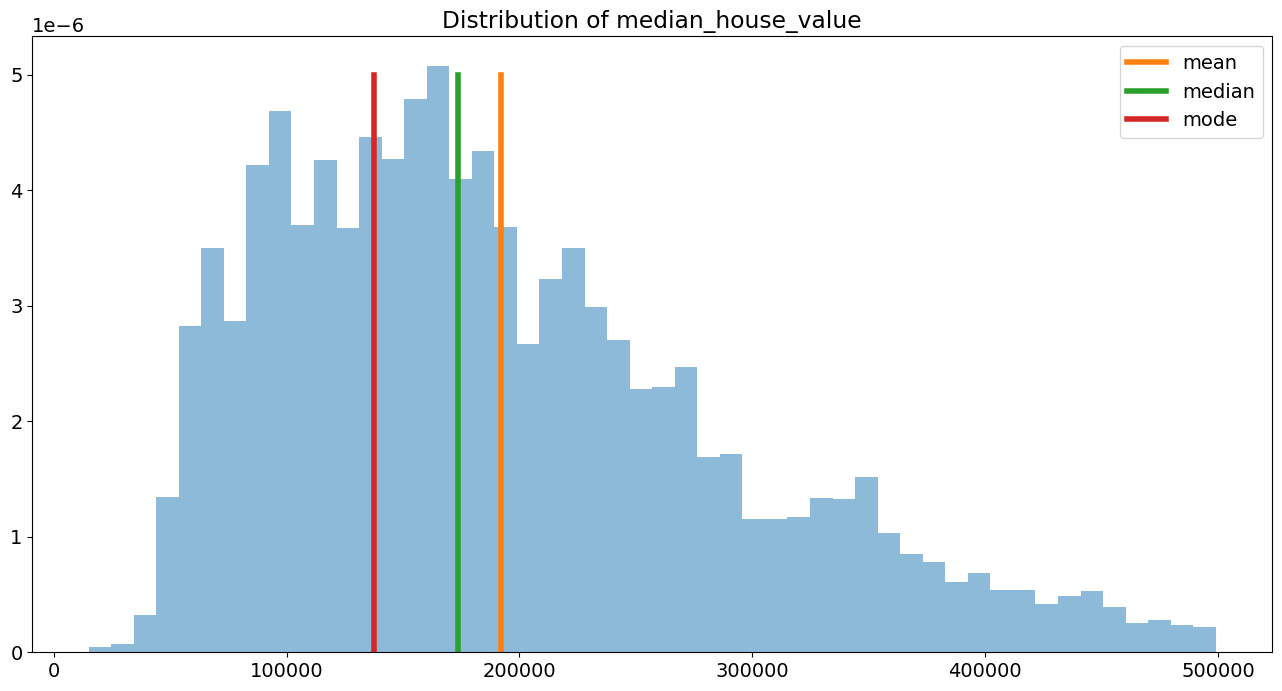

In [25]:
# удалим выбросы и перезапишем датасет (без выбросов)
df = df[df['median_house_value'] < 500000]

target_mean = round(df['median_house_value'].mean(), 2)
target_median = df['median_house_value'].median()
target_mode = df['median_house_value'].mode()[0]

plt.figure(figsize = (16, 8))
plt.hist(df['median_house_value'], density=True, bins=50, alpha=0.5)

y = np.linspace(0, 0.000005, 10)
plt.plot([target_mean] * 10, y, label='mean',  linewidth=4)
plt.plot([target_median] * 10, y, label='median',  linewidth=4)
plt.plot([target_mode] * 10, y, label='mode', linewidth=4)

plt.title('Distribution of median_house_value')
plt.legend()
plt.show()

Вывод: после удаления выбросов, график стал примерно совпадать с графиков после категоризации признака

# 2. Анализ признаков (фичей) <a class='anchor' id='features'>

### 2.1 Количественные признаки<a class='anchor' id='num_features'>

создадим датасет с количественными признаками и уберем оттуда целевую переменную

In [26]:
df_num_features = df.select_dtypes(include=['float64', 'float32', 'float16'])
df_num_features.drop('median_house_value', axis=1, inplace=True)

In [27]:
df_num_features

longitude   latitude  housing_median_age  total_rooms  total_bedrooms  \
0     -122.230003  37.880001                41.0        880.0           129.0   
1     -122.220001  37.860001                21.0       7099.0          1106.0   
2     -122.239998  37.849998                52.0       1467.0           190.0   
3     -122.250000  37.849998                52.0       1274.0           235.0   
4     -122.250000  37.849998                52.0       1627.0           280.0   
...           ...        ...                 ...          ...             ...   
20635 -121.089996  39.480000                25.0       1665.0           374.0   
20636 -121.209999  39.490002                18.0        697.0           150.0   
20637 -121.220001  39.430000                17.0       2254.0           485.0   
20638 -121.320000  39.430000                18.0       1860.0           409.0   
20639 -121.239998  39.369999                16.0       2785.0           616.0   

       population  households  median_income  bedroom_share  \
0           322.0       126.0         8.3252      14.659091   
1          2401.0      1138.0         8.3014      15.579659   
2           496.0       177.0         7.2574      12.951602   
3           558.0       219.0         5.6431      18.445839   
4           565.0       259.0         3.8462      17.209589   
...           ...         ...            ...            ...   
20635       845.0       330.0         1.5603      22.462463   
20636       356.0       114.0         2.5568      21.520803   
20637      1165.0       433.0         1.7000      21.517303   
20638       741.0       349.0         1.8672      21.989246   
20639      1387.0       530.0         2.3886      22.118492   

       population_per_room  
0                 0.365909  
1                 0.338217  
2                 0.338105  
3                 0.437991  
4                 0.347265  
...                    ...  
20635             0.507508  
20636             0.510760  
20637             0.516859  
20638             0.398387  
20639             0.498025  

[19648 rows x 10 columns]

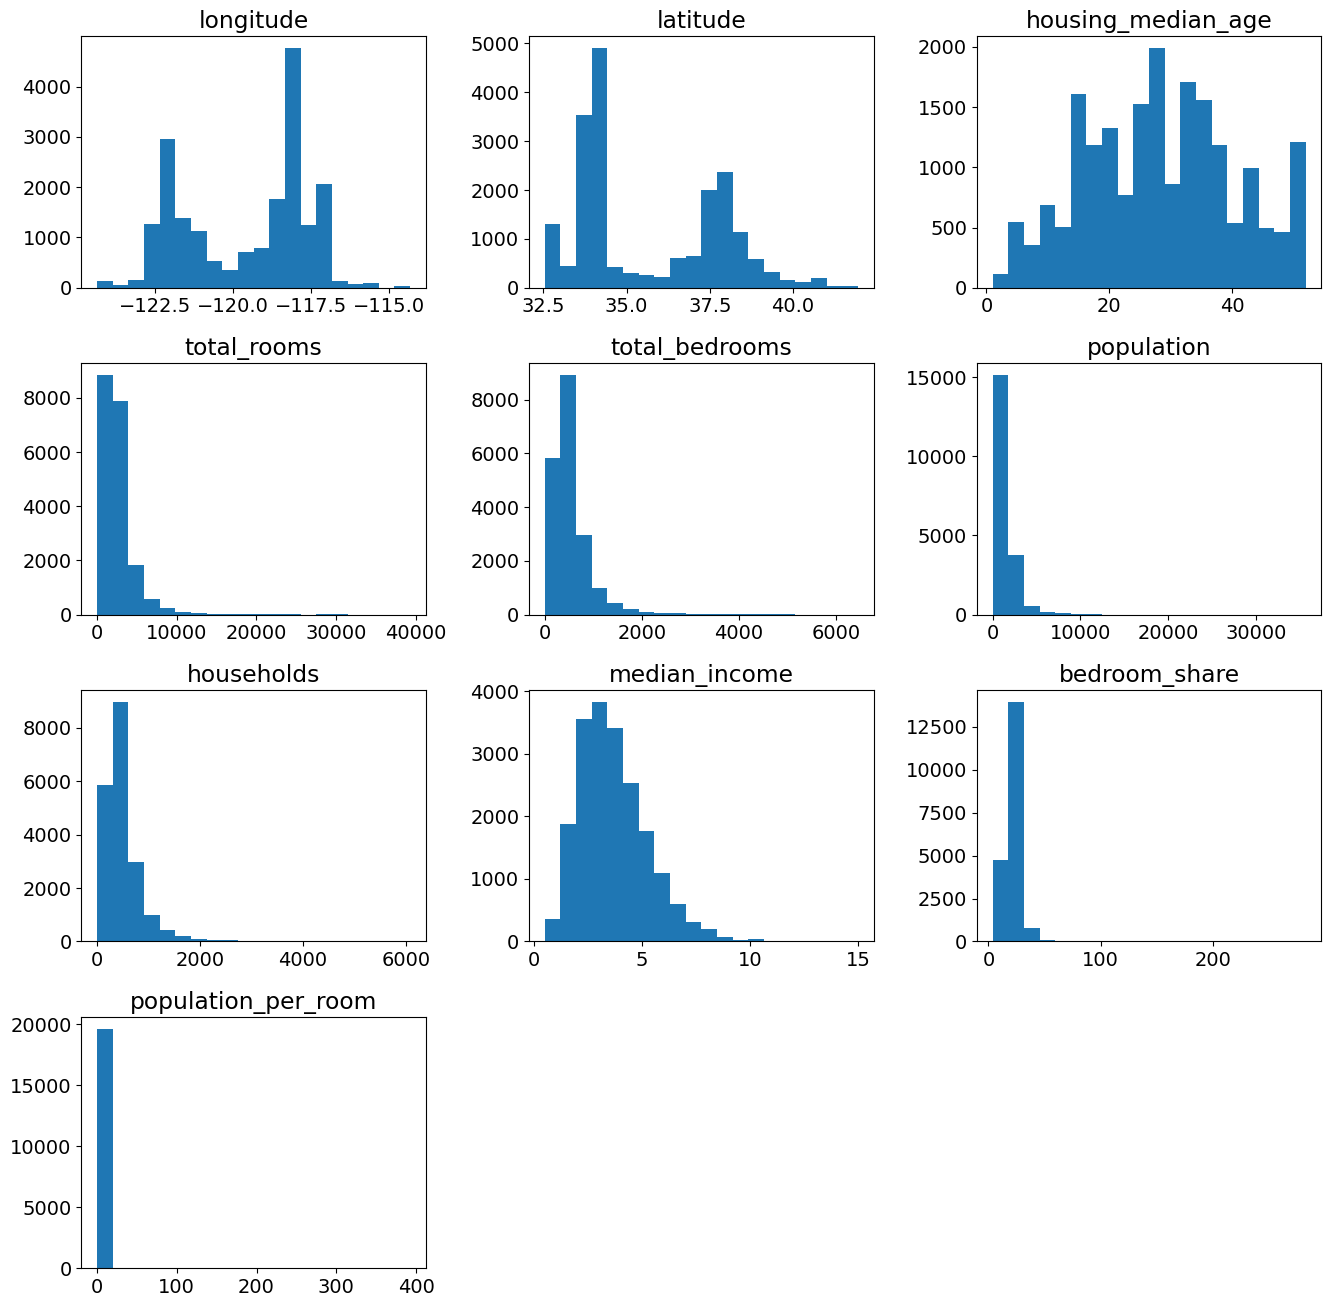

In [28]:
df_num_features.hist(figsize=(16,16), bins=20, grid=False);

Вывод: Широта и долгота показывает, что есть два больших района сосредоточения домов (по горочкам на графике). Останые надо проверять

### 'population_per_room' - среднее кол-во человек в комнате

рассмотри значения меньше 10, остальное будем счиатть выбросами

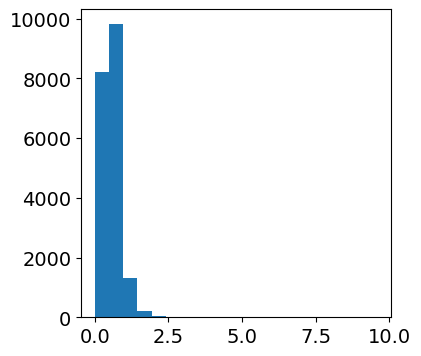

In [29]:
df.loc[df['population_per_room'] < 10, 'population_per_room'].\
    hist(figsize=(4,4), bins=20, grid=False);
# plt.yscale('log')

In [30]:
# значения больше 2,5 заменим на медиану
df.loc[df['population_per_room'] > 2.5, 'population_per_room'] = df['population_per_room'].median()

In [31]:
# если кол-во людей на комнату больше кол-ва комнат, такие значения тоже заменяем на медиану
df.loc[df['population_per_room'] > df['total_rooms'], 'population_per_room'] = df['population_per_room'].median()

<Axes: xlabel='population_per_room', ylabel='Density'>

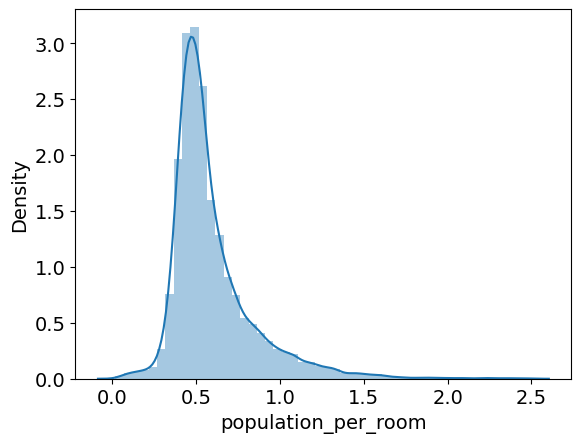

In [32]:
sns.distplot(df['population_per_room'])

<Axes: ylabel='population_per_room'>

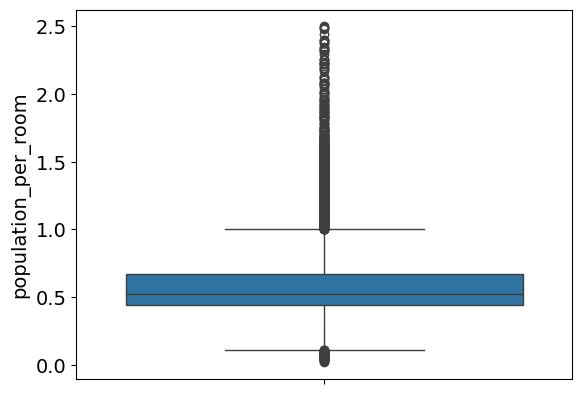

In [33]:
sns.boxplot(df['population_per_room'])

построим график зависимости количества спален в доме от дохода семьи (для сравнения)

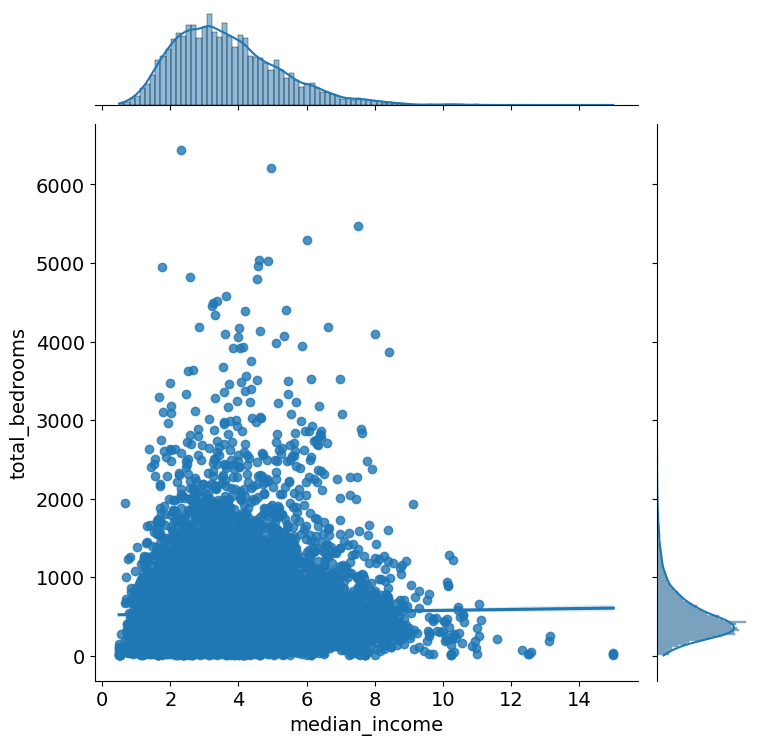

In [34]:
grid = sns.jointplot(x = df['median_income'], y = df['total_bedrooms'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

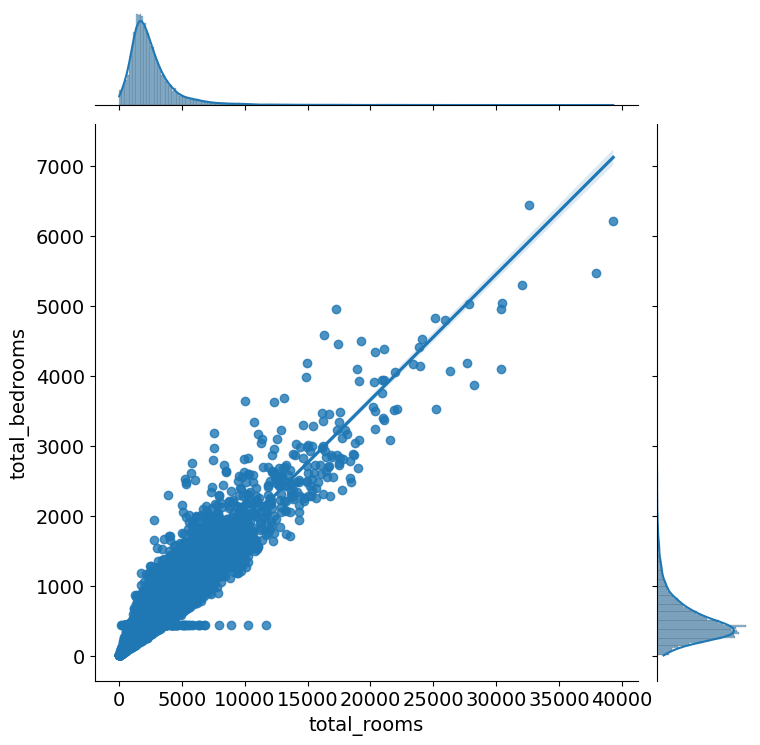

In [35]:
grid = sns.jointplot(x = df['total_rooms'], y = df['total_bedrooms'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

Вывод: в первом случае (зависимости количества спален от дохода семьи) зависимости нет, во втором случае - прямопропорциональная линейная зависимости (сильная положительная корреляция)

### 'total_bedrooms' - количество спален

In [36]:
df['total_bedrooms'].describe()

count    19648.000000
mean       538.580627
std        420.528046
min          2.000000
25%        299.000000
50%        435.000000
75%        644.250000
max       6445.000000
Name: total_bedrooms, dtype: float64

In [37]:
df['total_bedrooms'].median()

435.0

In [38]:
df[df['total_bedrooms'] == 435].shape[0] * 100 / df.shape[0]

1.2011400651465798

In [39]:
df[df['total_bedrooms'] == df['total_bedrooms'].median()].shape[0]

236

Посмотрим зоны распередения домов по широте и долготе

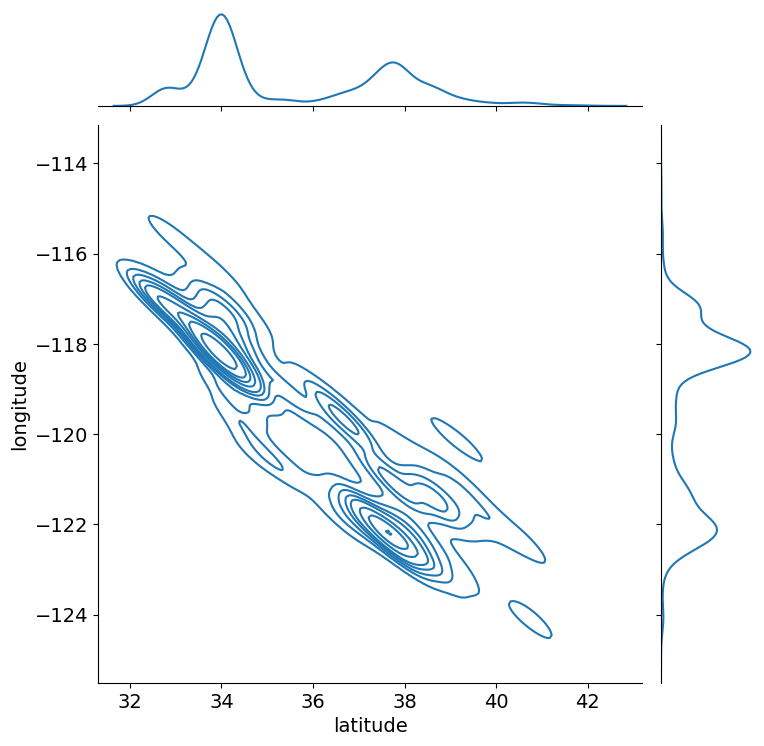

In [40]:
grid = sns.jointplot(x = df['latitude'], y = df['longitude'], kind='kde')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

Распределим датасет по этим районам. Для этого возьме за раздел долготу -120. Все что больше -120 пометим 1, что меньше - 0. И запишем эти данные в новый признак 'city'

In [41]:
df['city'] = (df['longitude'] > -120) * 1

In [42]:
df.head()

longitude   latitude  housing_median_age  total_rooms  total_bedrooms  \
0 -122.230003  37.880001                41.0        880.0           129.0   
1 -122.220001  37.860001                21.0       7099.0          1106.0   
2 -122.239998  37.849998                52.0       1467.0           190.0   
3 -122.250000  37.849998                52.0       1274.0           235.0   
4 -122.250000  37.849998                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

   id  bedroom_share  population_per_room  <1H OCEAN  INLAND  ISLAND  \
0   0      14.659091             0.365909          0       0       0   
1   1      15.579659             0.338217          0       0       0   
2   2      12.951602             0.338105          0       0       0   
3   3      18.445839             0.437991          0       0       0   
4   4      17.209589             0.347265          0       0       0   

   NEAR BAY  NEAR OCEAN  city  
0         1           0     0  
1         1           0     0  
2         1           0     0  
3         1           0     0  
4         1           0     0

**Поиск выбросов с помощью box plot**

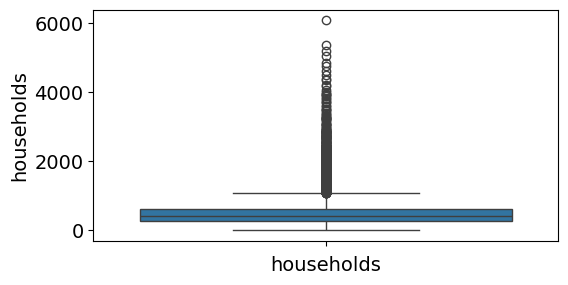

In [43]:
plt.figure(figsize=(6, 3))

sns.boxplot(df['households'], whis=1.5)

plt.xlabel('households')
plt.show()

In [44]:
df['households'].describe()

count    19648.000000
mean       501.192474
std        383.391357
min          2.000000
25%        282.000000
50%        411.000000
75%        606.000000
max       6082.000000
Name: households, dtype: float64

отсекаем все значения больше 800, заменяя их на медиану

In [45]:
df.loc[df['households'] > 800, 'households'] = df['households'].median()

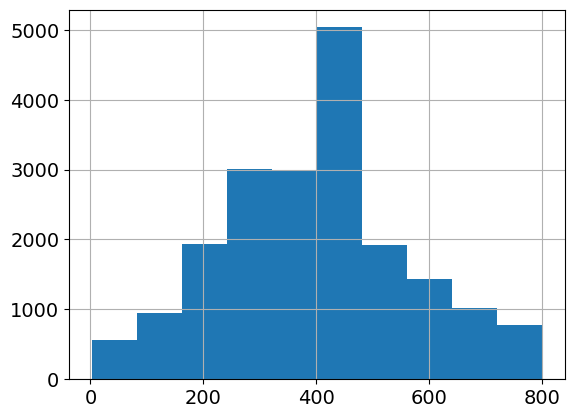

In [46]:
df['households'].hist(); 

### 2.2 Категориальные признаки<a class='anchor' id='cat_features'>

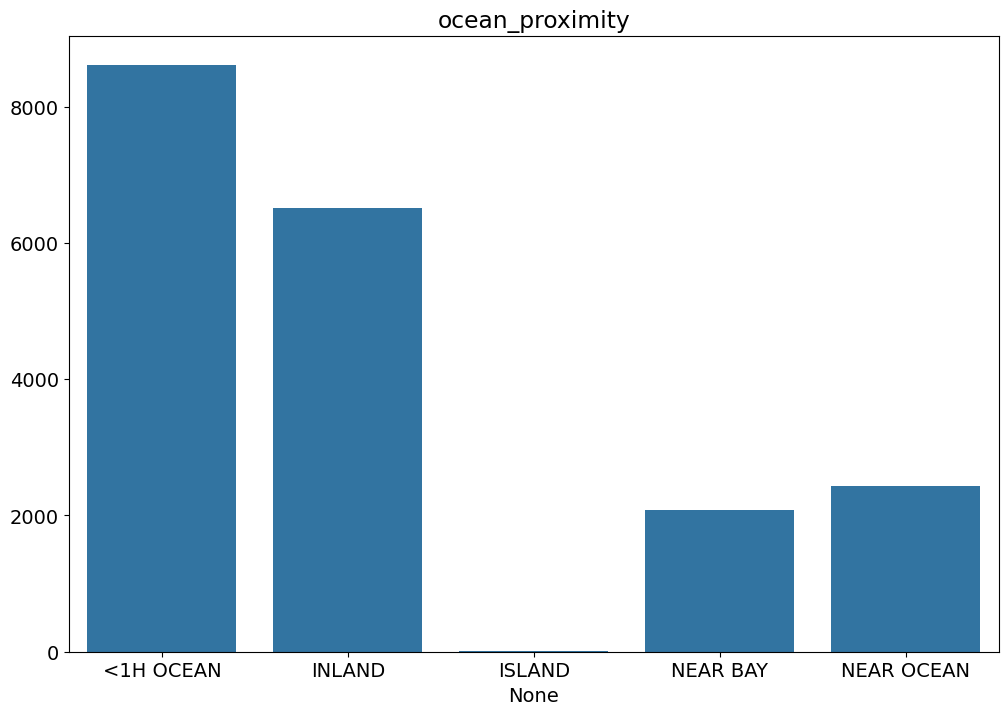

In [47]:
counts = df['ocean_proximity'].value_counts()
    
plt.figure(figsize=(12,8))    
plt.title('ocean_proximity')
sns.barplot(x = counts.index, y = counts.values)
    
plt.show()

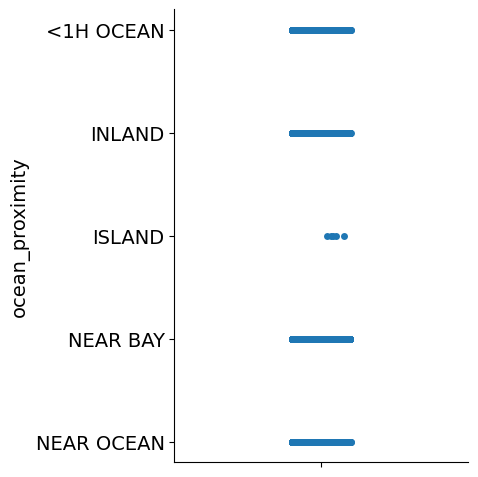

In [48]:
sns.catplot(data=df['ocean_proximity'])

In [49]:
df['ocean_proximity'].value_counts()

<1H OCEAN     8609
INLAND        6514
NEAR OCEAN    2434
NEAR BAY      2086
ISLAND           5
Name: ocean_proximity, dtype: int64

### 2.3 Бинарные признаки<a class='anchor' id='binary_features'>

In [50]:
df_bin_features = df.select_dtypes(include='int8')
df_bin_features

<1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
0              0       0       0         1           0
1              0       0       0         1           0
2              0       0       0         1           0
3              0       0       0         1           0
4              0       0       0         1           0
...          ...     ...     ...       ...         ...
20635          0       1       0         0           0
20636          0       1       0         0           0
20637          0       1       0         0           0
20638          0       1       0         0           0
20639          0       1       0         0           0

[19648 rows x 5 columns]

In [51]:
counts = df['NEAR BAY'].value_counts()
counts

0    17562
1     2086
Name: NEAR BAY, dtype: int64

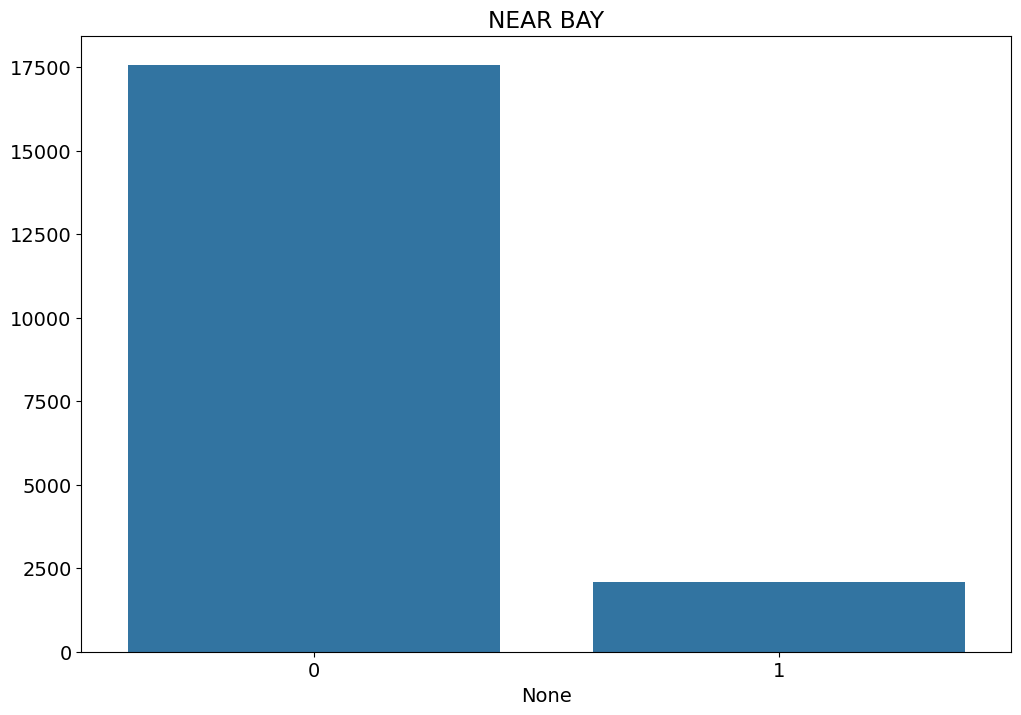

In [52]:
plt.figure(figsize=(12,8))    
plt.title('NEAR BAY')
sns.barplot(x = counts.index, y = counts.values)
    
plt.show()

### 2.4 Матрица корреляций<a class='anchor' id='corr'>

- Показывает линейную связь между переменными
- Изменяется от -1 до 1
- Корреляция - мера только __линейной__ связи

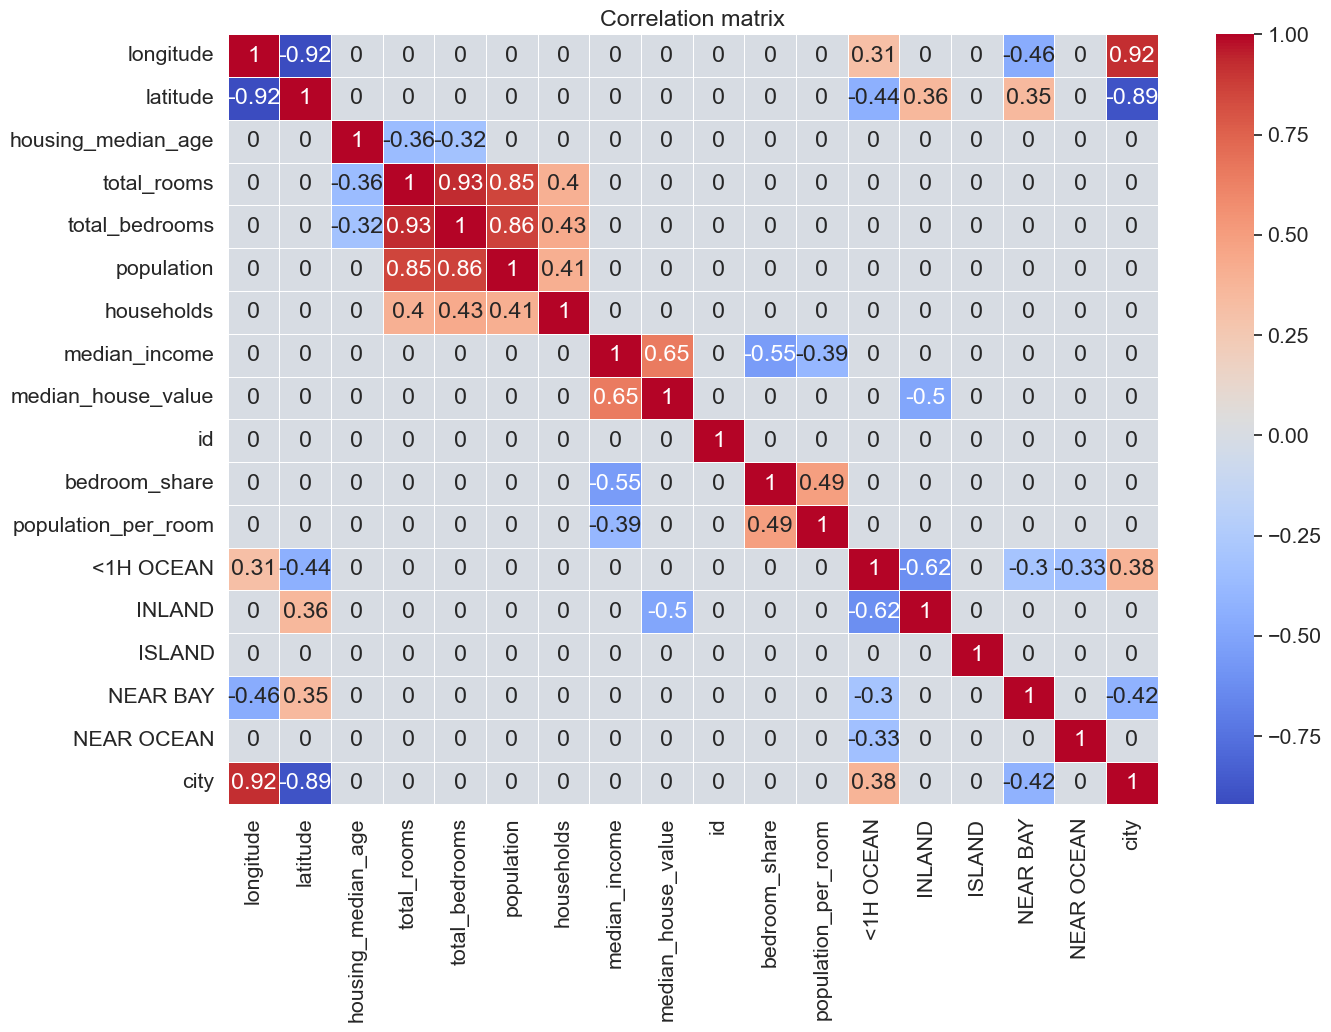

In [53]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

In [54]:
# sns.pairplot(df)

# 3. Анализ зависимости таргета от фичей<a class='anchor' id='target_features'>

## 3.1 Количественные признаки<a class='anchor' id='num_features_target'>

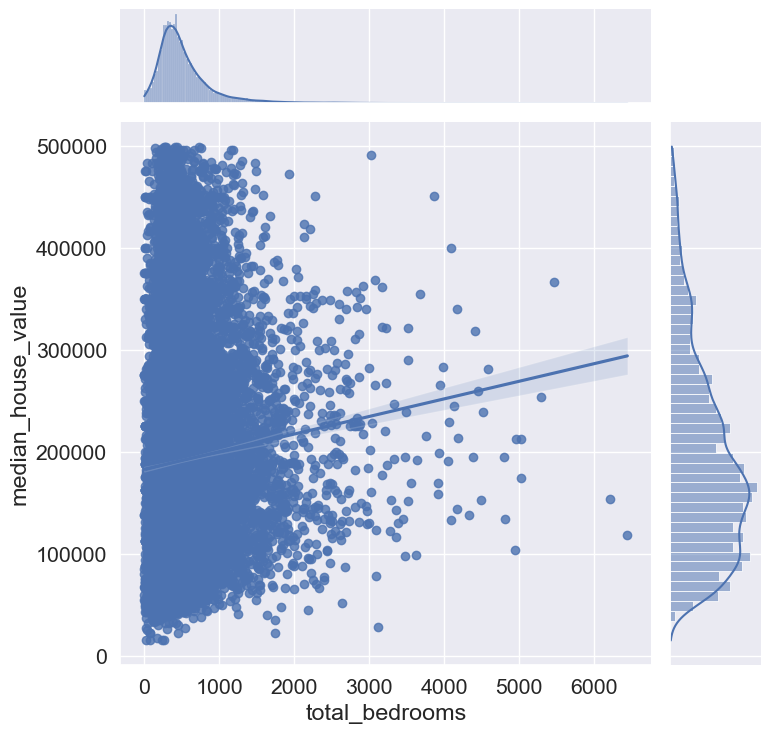

In [55]:
grid = sns.jointplot(x = df['total_bedrooms'], y = df['median_house_value'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

In [56]:
df['many_bedrooms'] = (df['total_bedrooms'] > 3000) * 1

**latitude** - широта

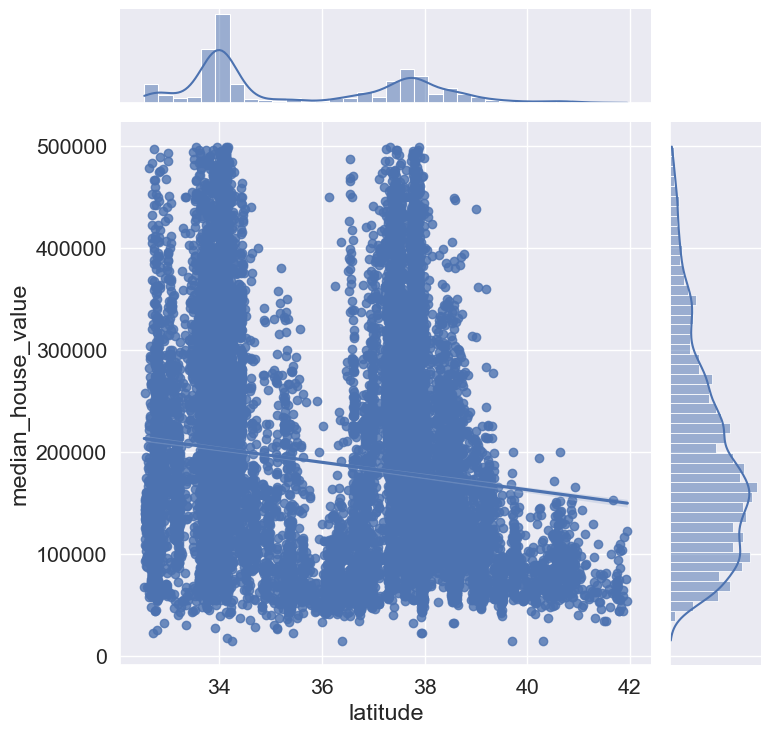

In [57]:
# зависимость стоимости дома от широты
grid = sns.jointplot(x=df['latitude'], y=df['median_house_value'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

Видно два города, имеет смысл посмотреть на зависимость по отдельности

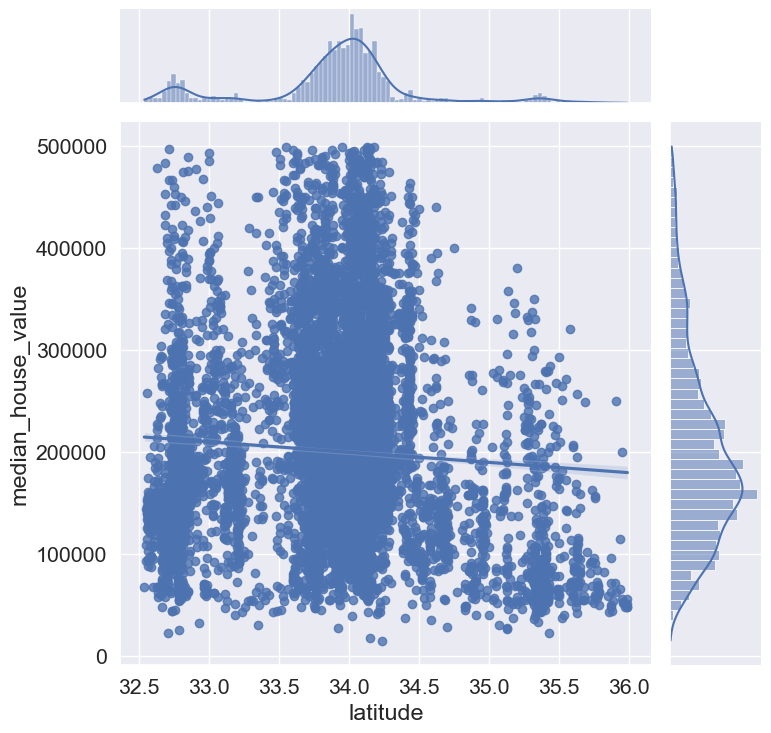

In [58]:
df_cut = df[df['latitude'] < 36]
grid = sns.jointplot(x=df_cut['latitude'], y=df_cut['median_house_value'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

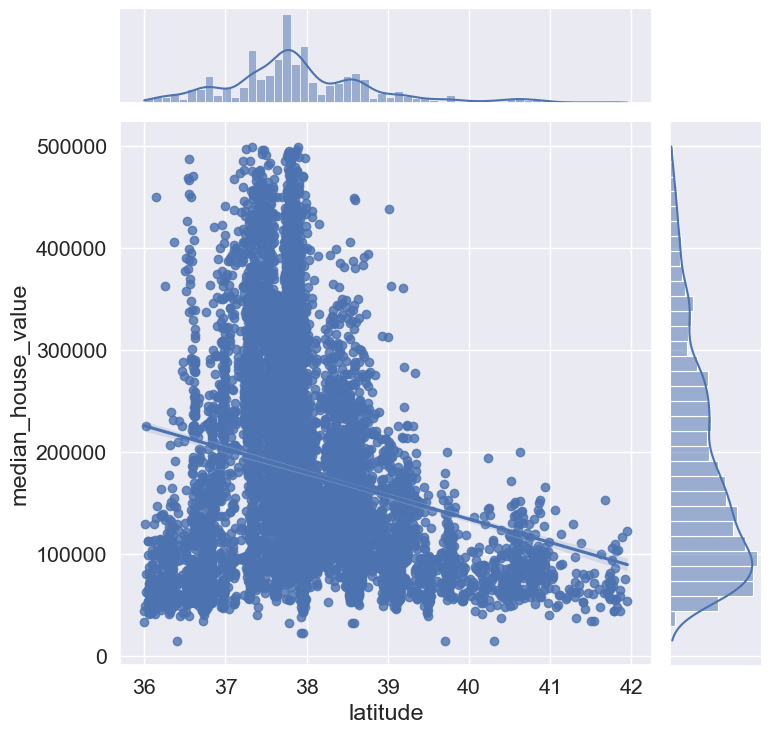

In [59]:
df_cut = df[df['latitude'] >= 36]
grid = sns.jointplot(x=df_cut['latitude'], y=df_cut['median_house_value'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

Вывод: как видно на графике, особой зависимости нет

**longitude** - долгота

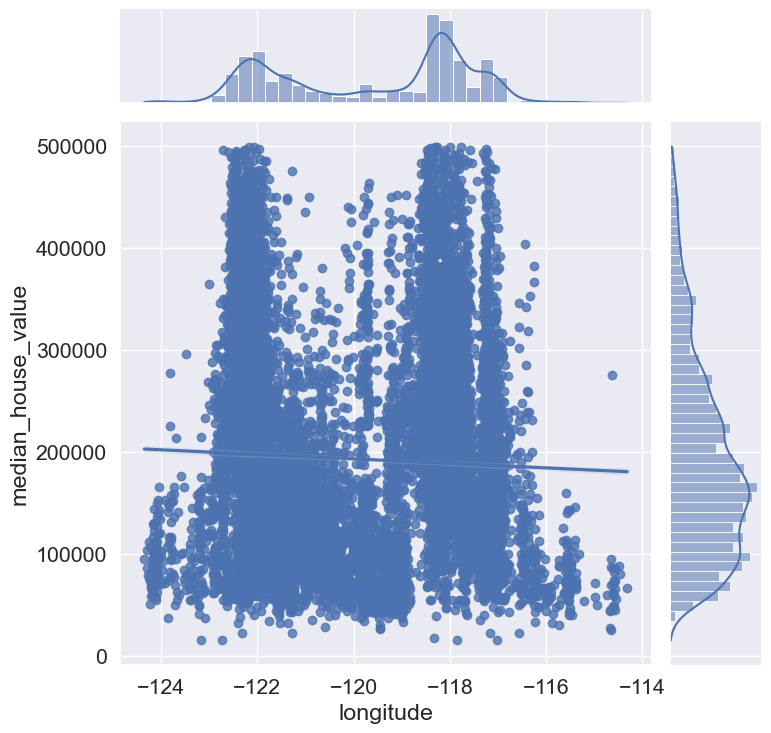

In [60]:
grid = sns.jointplot(x=df['longitude'], y=df['median_house_value'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

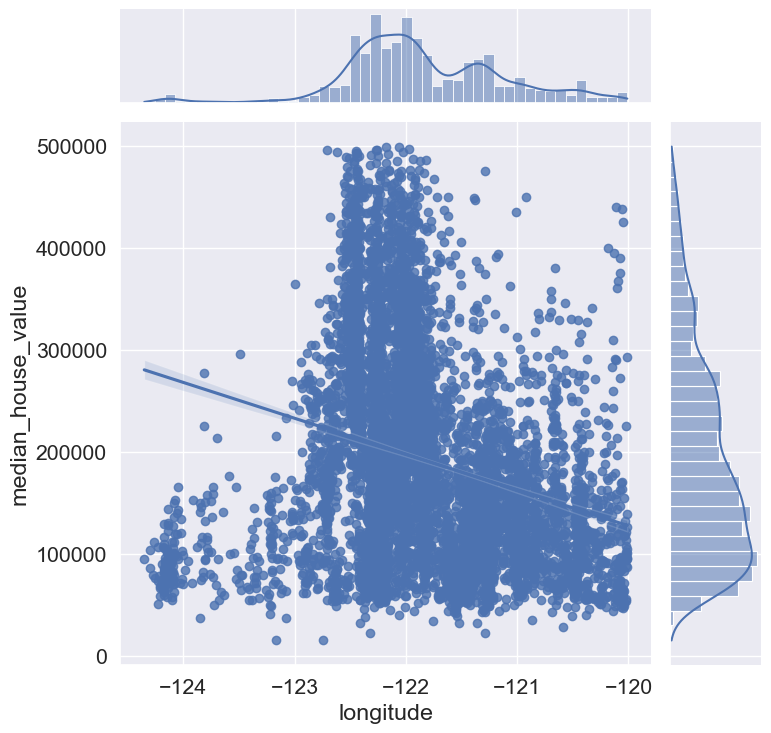

In [61]:
df_cut = df[df['longitude'] < -120]
grid = sns.jointplot(x=df_cut['longitude'], y=df_cut['median_house_value'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

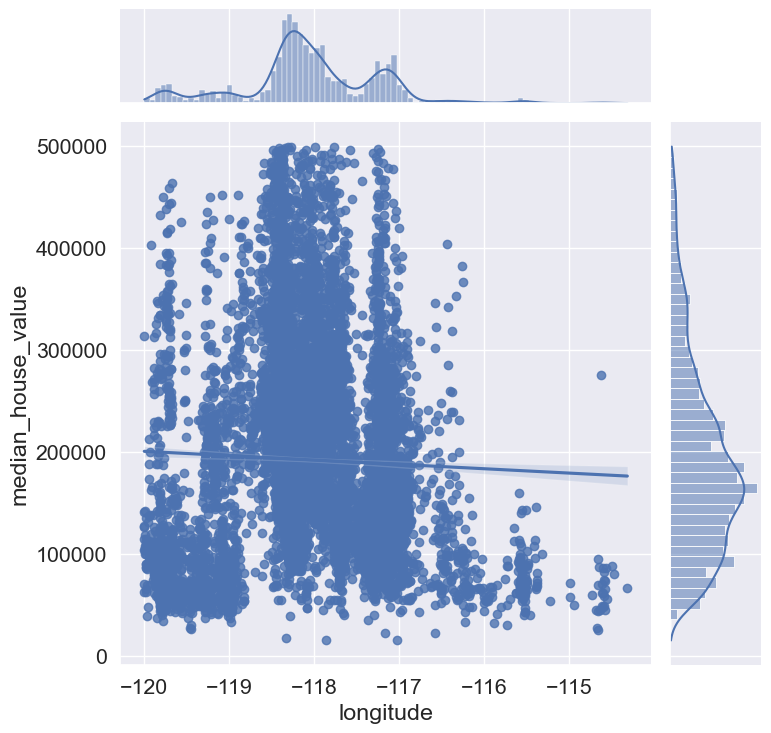

In [62]:
df_cut = df[df['longitude'] >= -120]
grid = sns.jointplot(x=df_cut['longitude'], y=df_cut['median_house_value'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

Вывод: зависимости по долготе тоже не выявлено

## 3.2 Категориальные / бинарные признаки<a class='anchor' id='cat_bin_features'>

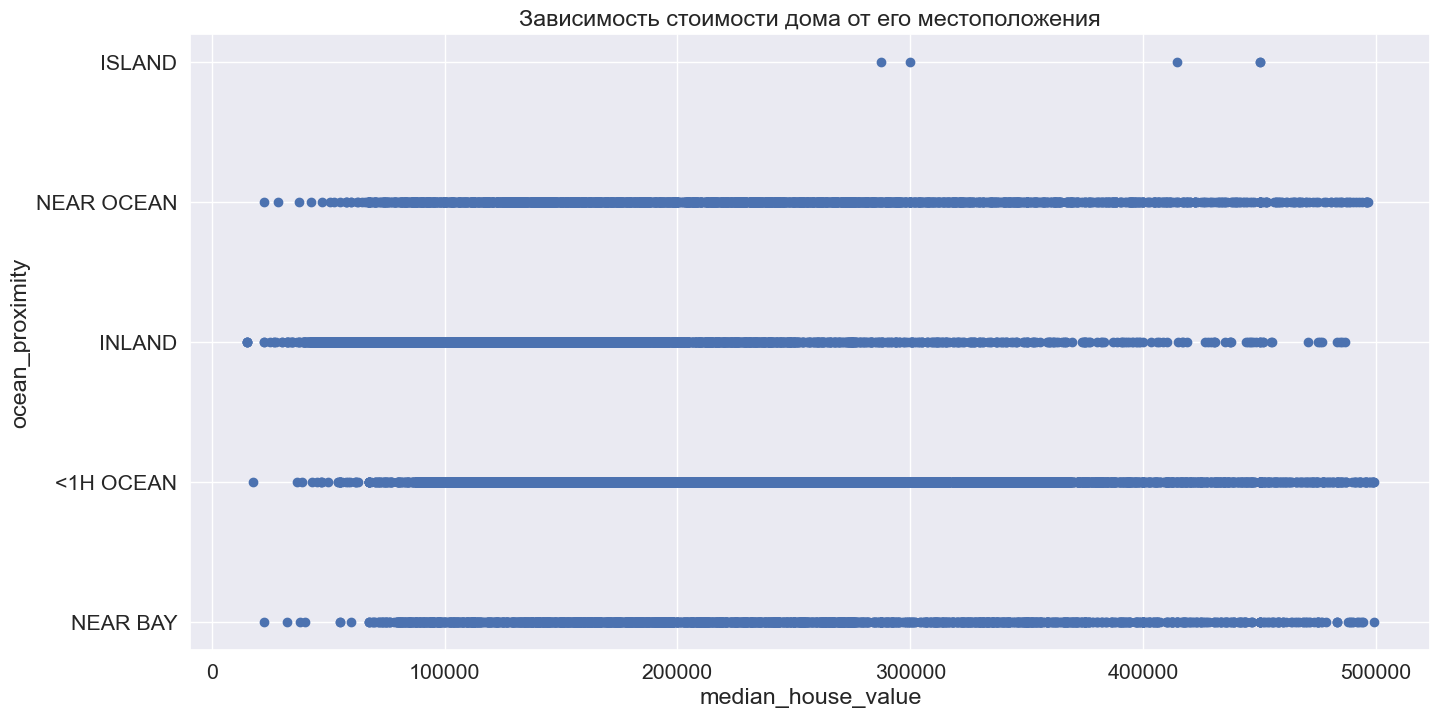

In [63]:
plt.figure(figsize=(16, 8))

plt.scatter(df['median_house_value'], df['ocean_proximity'])

plt.xlabel('median_house_value')
plt.ylabel('ocean_proximity')
plt.title('Зависимость стоимости дома от его местоположения')
plt.show()

### box plot

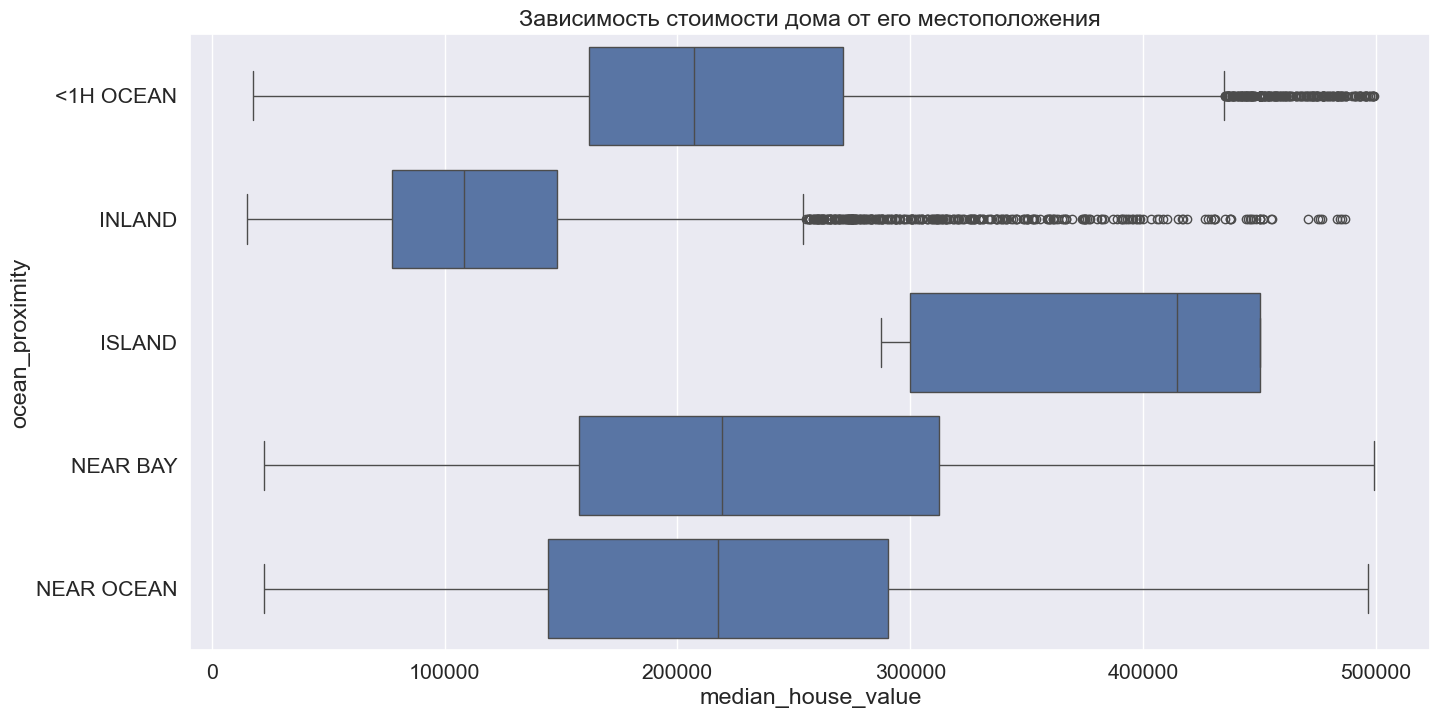

In [64]:
plt.figure(figsize=(16, 8))

sns.boxplot(x=df['median_house_value'], y=df['ocean_proximity'], whis=1.5)

plt.xlabel('median_house_value')
plt.ylabel('ocean_proximity')
plt.title('Зависимость стоимости дома от его местоположения')
plt.show()

**Как строится box plot**  

[Подробное объяснение](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

- box - от 25% до 75% квантиля
- линия в середине box - медиана
- "усы"

**Как строятся "усы"** - вариантов масса
- среднее  +/-  3 сигма (стандартное отклонение)
- min / max
- median  +/-  1.5*(q75 - q25), 
- ...

*Интерквартильный размах = q75 - q25

### Violin plot

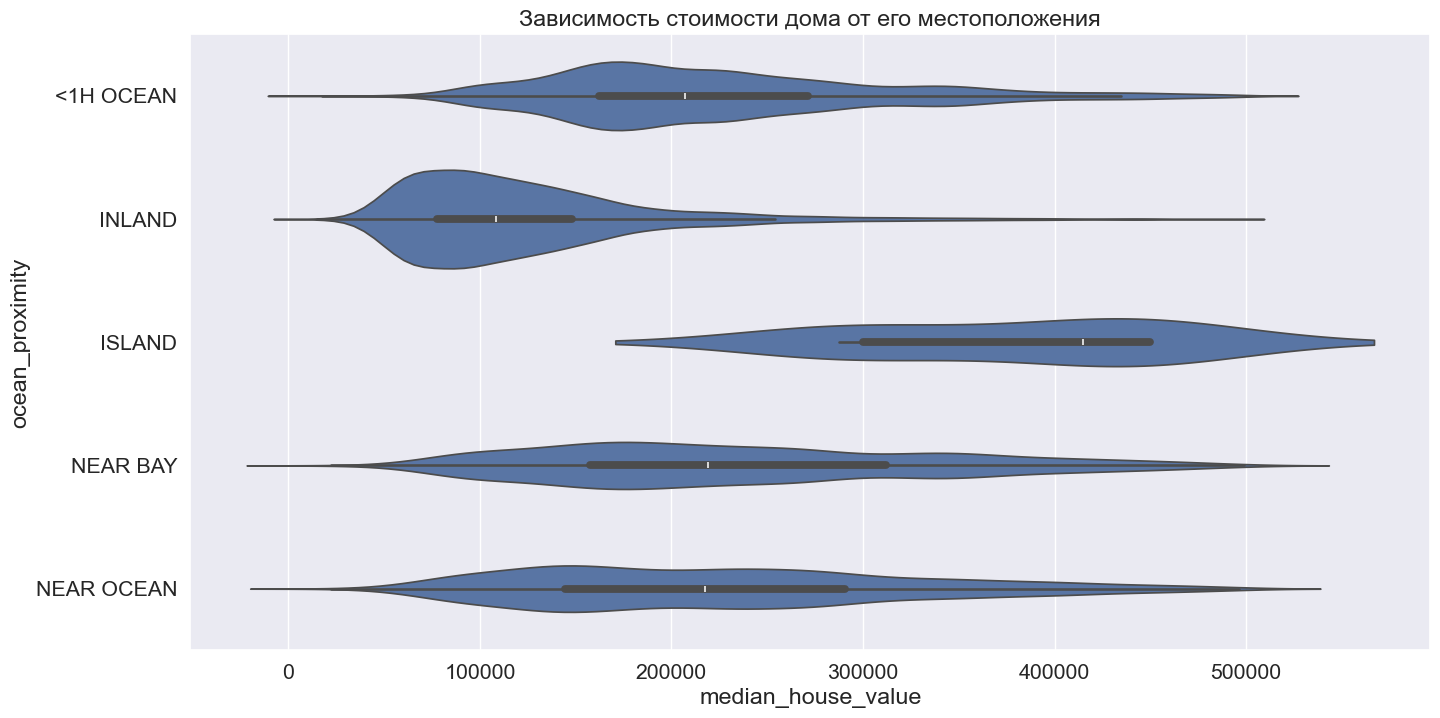

In [65]:
plt.figure(figsize=(16, 8))

sns.violinplot(x=df['median_house_value'], y=df['ocean_proximity'])

plt.xlabel('median_house_value')
plt.ylabel('ocean_proximity')
plt.title('Зависимость стоимости дома от его местоположения')
plt.show()

## 3.3 Гео данные*<a class='anchor' id='geo'>

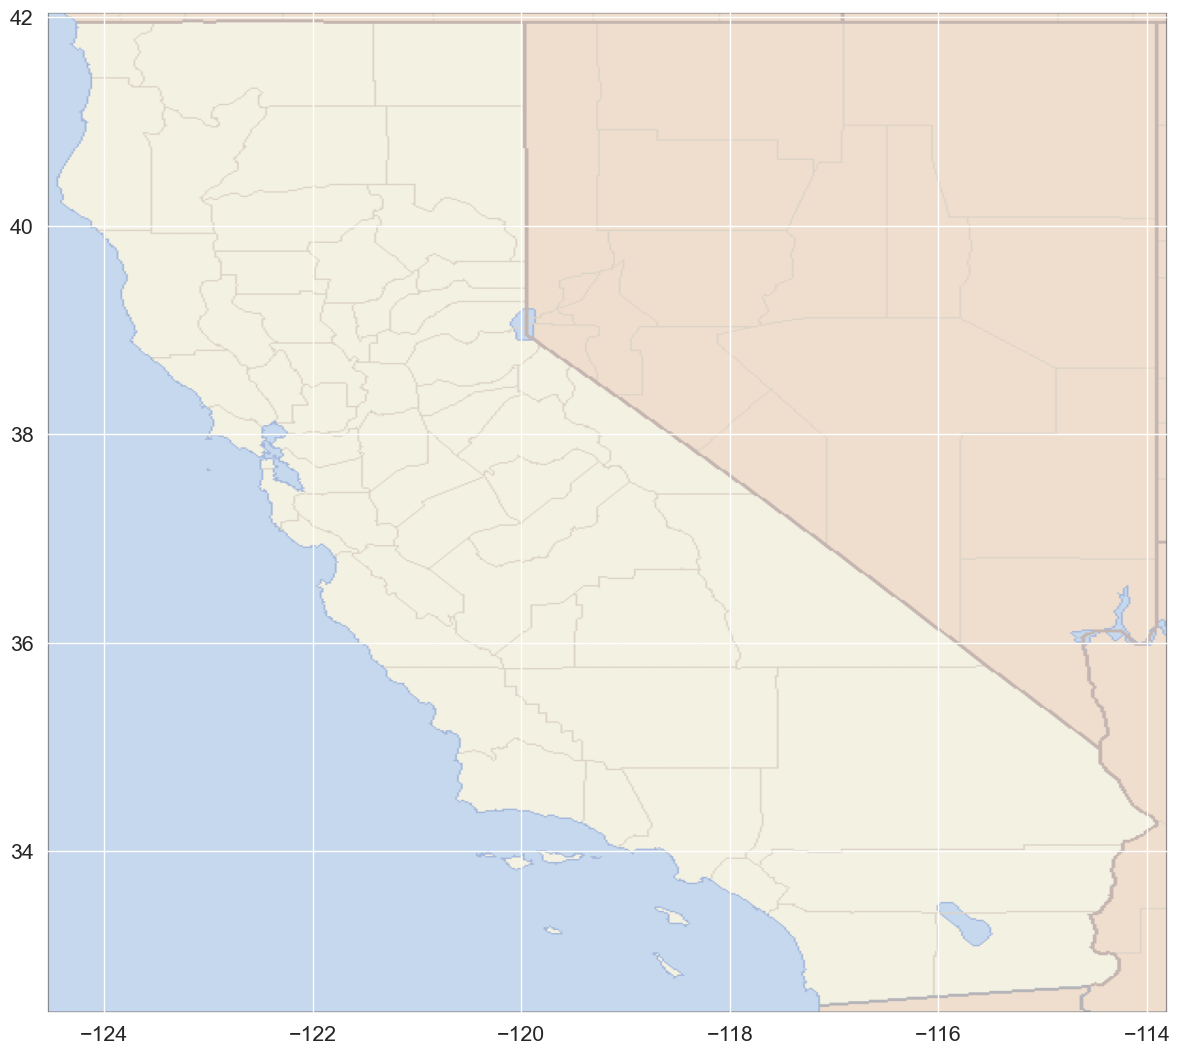

In [66]:
california_map = img.imread(CALIFORNIA_MAP_PATH)

plt.figure(figsize=(20,13))
plt.imshow(california_map, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.show()

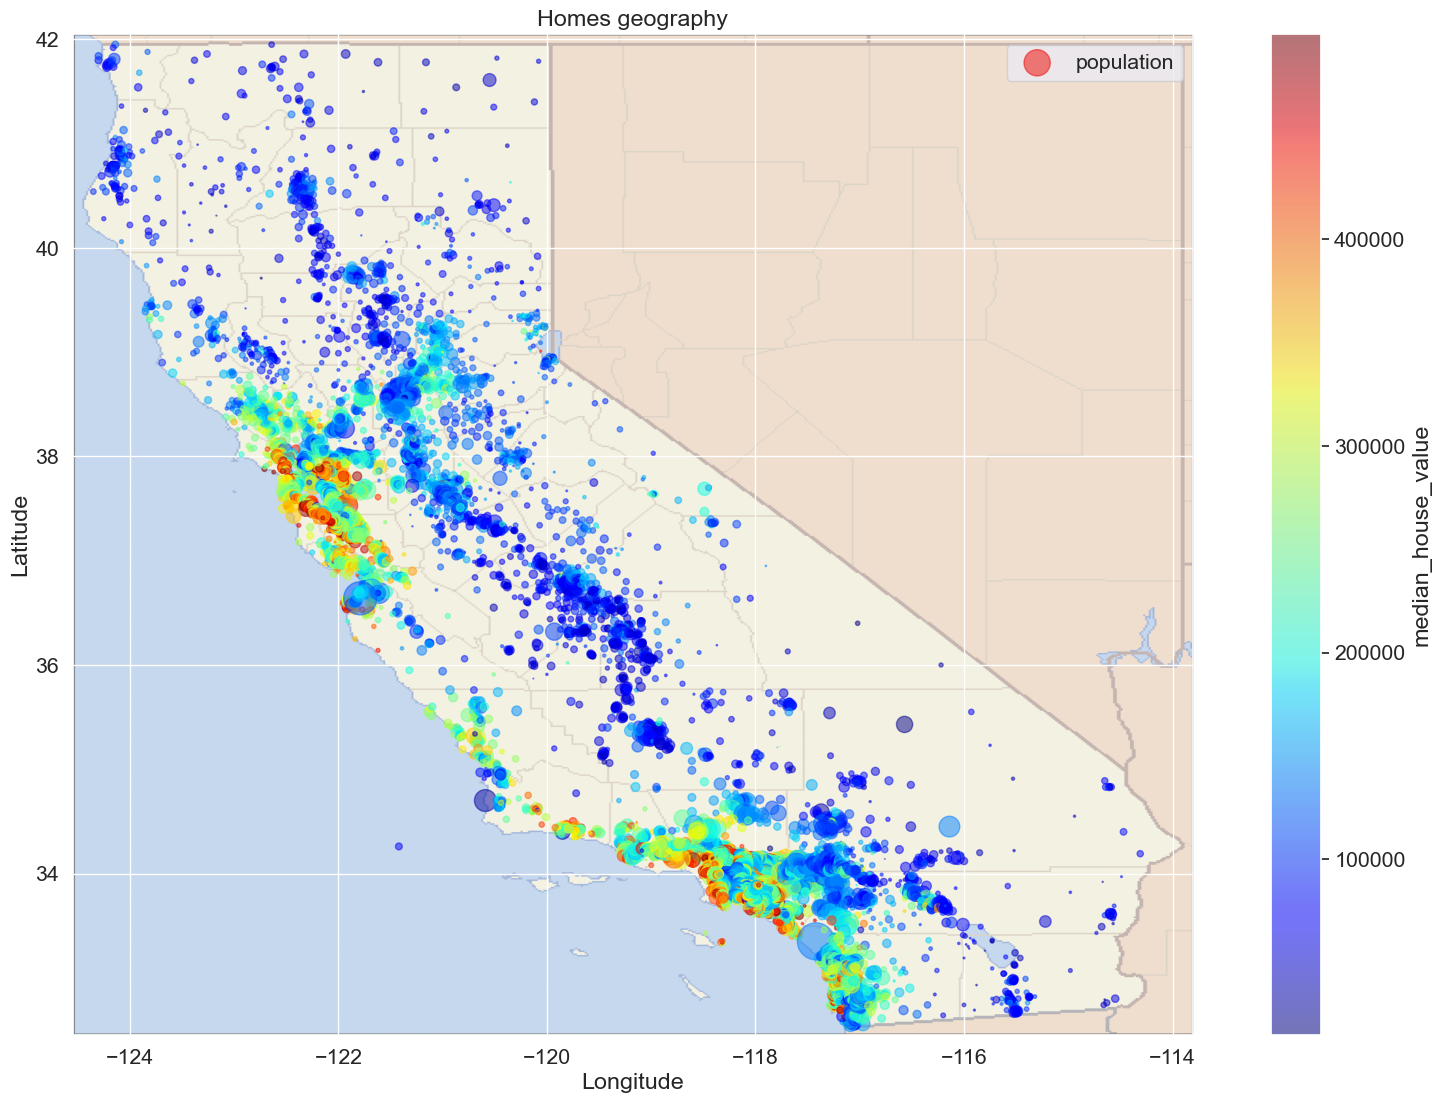

In [67]:
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.5, 
        s=df['population'] / 50, label='population', c='median_house_value', 
        cmap=plt.get_cmap('jet'), figsize=(20,13))

plt.imshow(california_map, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Homes geography")
plt.legend() 
plt.show()

## Kepler**

In [68]:
# !conda install -c conda-forge keplergl

In [69]:
# !pip install keplergl==0.1.1

In [70]:
# !pip install keplergl==0.1.1

# from keplergl import KeplerGl 

# map_ = KeplerGl(height=700)
# map_.add_data(df, 'Data')
# map_.save_to_html(file_name='./california.html')

### Target encoding**

In [71]:
df[['latitude', 'longitude', 'median_house_value']].head()

latitude   longitude  median_house_value
0  37.880001 -122.230003            452600.0
1  37.860001 -122.220001            358500.0
2  37.849998 -122.239998            352100.0
3  37.849998 -122.250000            341300.0
4  37.849998 -122.250000            342200.0

In [72]:
df['latitude'] = np.round(df['latitude'], 0)
df['longitude'] = np.round(df['longitude'], 0)
df[['latitude', 'longitude', 'median_house_value']].head()

latitude  longitude  median_house_value
0      38.0     -122.0            452600.0
1      38.0     -122.0            358500.0
2      38.0     -122.0            352100.0
3      38.0     -122.0            341300.0
4      38.0     -122.0            342200.0

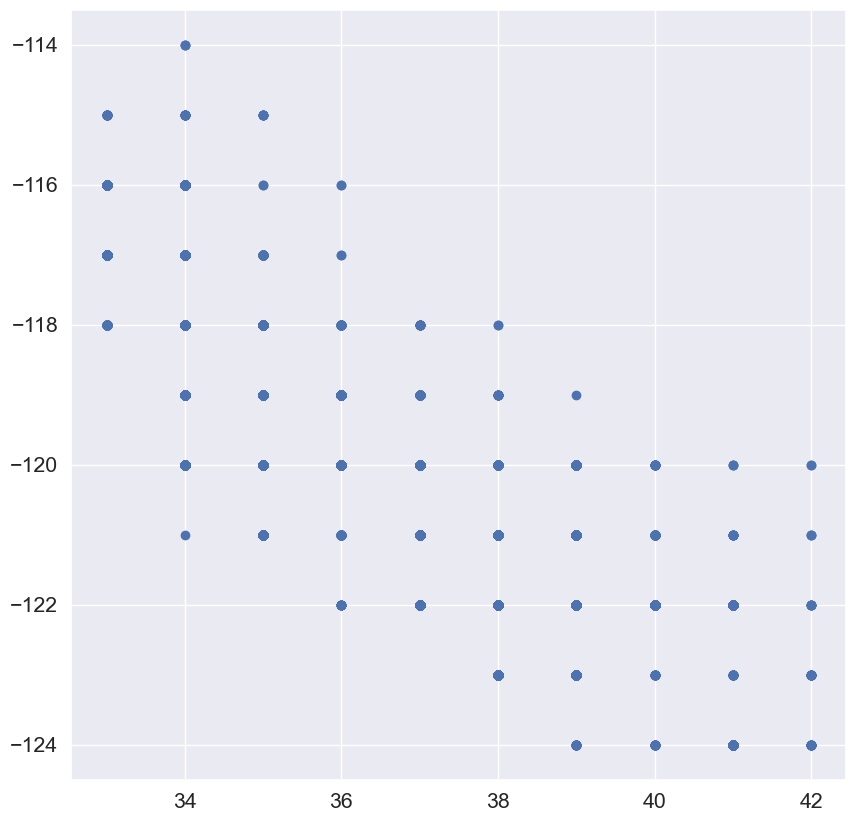

In [73]:
plt.figure(figsize=(10,10))
plt.scatter(df['latitude'], df['longitude'])
plt.show()

In [74]:
df[['latitude', 'longitude']].drop_duplicates().shape[0]

58

In [75]:
df_g = df.groupby(['latitude', 'longitude'])['median_house_value'].mean().reset_index()
df_g.head()

latitude  longitude  median_house_value
0      33.0     -118.0       301901.531250
1      33.0     -117.0       188134.125000
2      33.0     -116.0        76203.921875
3      33.0     -115.0        74519.234375
4      34.0     -121.0        73100.000000